In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster, datasets
from scipy import misc

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

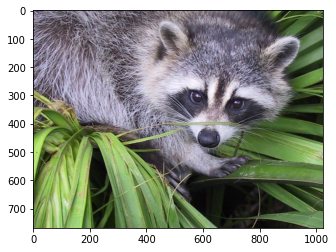

In [2]:
face = misc.face()
plt.imshow(face)
plt.show()

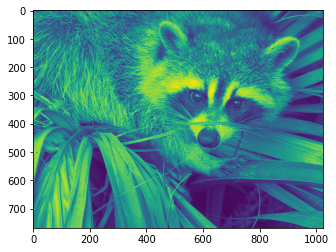

In [3]:
# Grescale
gray_face = misc.face(gray=True)
plt.imshow(gray_face)
plt.show()

In [4]:
face.shape

(768, 1024, 3)

In [5]:
gray_face.shape

(768, 1024)

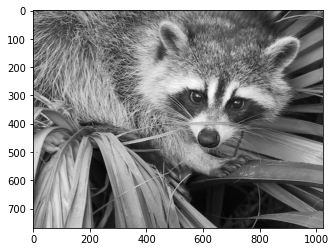

In [6]:
# Grayscale
gray_face = misc.face(gray=True)
plt.imshow(gray_face, cmap='gray')
plt.show()

In [7]:
gray_face.min()

0

In [8]:
gray_face.max()

250

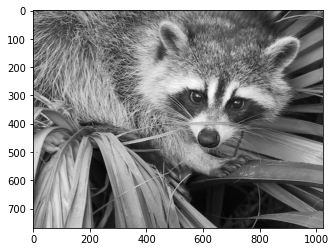

In [9]:
plt.imshow(gray_face, cmap='gray', vmin=gray_face.min(), vmax=gray_face.max())
plt.show()

In [10]:
gray_face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [11]:
gray_face.shape

(768, 1024)

In [12]:
gray_face.dtype

dtype('uint8')

In [13]:
# Falttening the image
gray_face_flat = gray_face.reshape((-1, 1))
gray_face_flat.shape

(786432, 1)

In [14]:
# K Means Clustering
n_clusters = 5

kmeans = cluster.KMeans(n_clusters=n_clusters)

In [15]:
kmeans.fit(gray_face_flat)

KMeans(n_clusters=5)

In [16]:
centres = kmeans.cluster_centers_
centres

array([[150.78205092],
       [ 27.11166441],
       [192.8878986 ],
       [112.58331688],
       [ 73.91549783]])

In [17]:
centres = centres.reshape((1,-1)).squeeze()
centres

array([150.78205092,  27.11166441, 192.8878986 , 112.58331688,
        73.91549783])

In [18]:
centres[0]

150.78205092027432

In [19]:
labels = kmeans.labels_
labels

array([3, 3, 0, ..., 0, 0, 0], dtype=int32)

In [20]:
len(labels)

786432

In [21]:
# Broadcasting the centre values in their label places to get comporesed values
compressed_values = np.zeros(labels.shape)
for i in range(len(labels)):
    compressed_values[i] = centres[labels[i]]

In [22]:
compressed_values

array([112.58331688, 112.58331688, 150.78205092, ..., 150.78205092,
       150.78205092, 150.78205092])

In [23]:
len(compressed_values)

786432

In [24]:
# Reshaping the compressed values to get original image shape
compressed_img = compressed_values.reshape(gray_face.shape)
compressed_img.shape

(768, 1024)

In [25]:
compressed_img.dtype

dtype('float64')

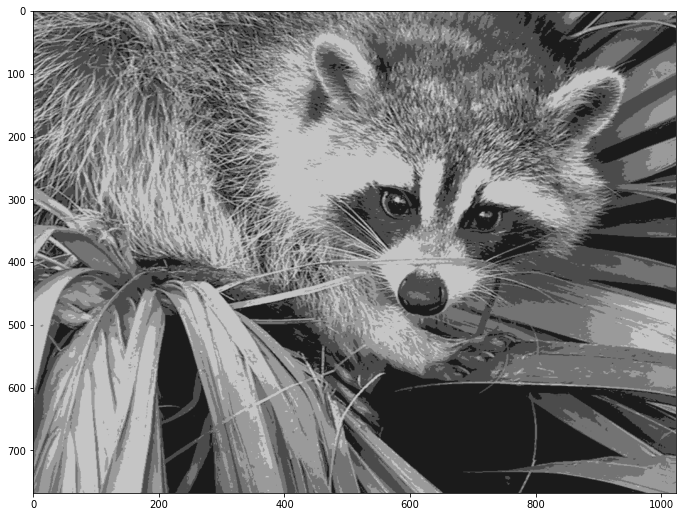

In [26]:
plt.figure(figsize=[1.5*7.68, 1.5*10.24])
plt.imshow(compressed_img, cmap='gray', vmin=gray_face.min(), vmax=gray_face.max())
plt.show()

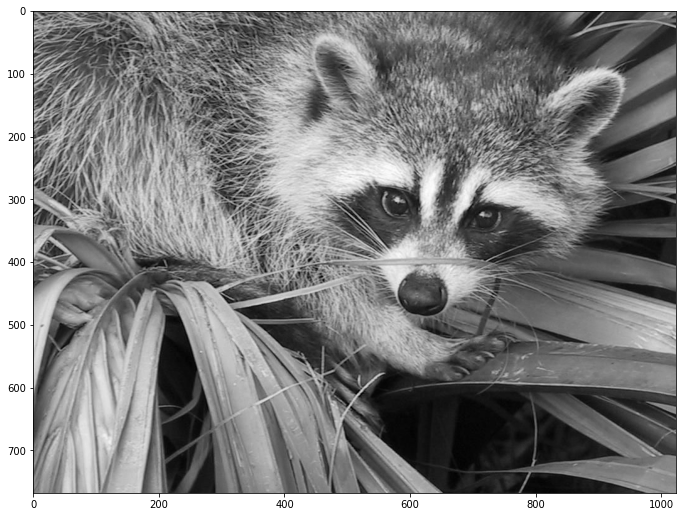

In [27]:
# Here's the Original image
plt.figure(figsize=[1.5*7.68, 1.5*10.24])
plt.imshow(gray_face, cmap='gray', vmin=gray_face.min(), vmax=gray_face.max())
plt.show()

In [28]:
#

In [29]:
#

In [30]:
#

## Let's Test with 3 Clusters

In [31]:
n_clusters = 3
km3 = cluster.KMeans(n_clusters=n_clusters)
km3.fit(gray_face_flat)

KMeans(n_clusters=3)

In [32]:
centres = km3.cluster_centers_.reshape((1,-1)).squeeze()
labels = km3.labels_

compressed_values = np.zeros(labels.shape)
for i in range(len(labels)):
    compressed_values[i] = centres[labels[i]]

compressed_img = compressed_values.reshape(gray_face.shape)

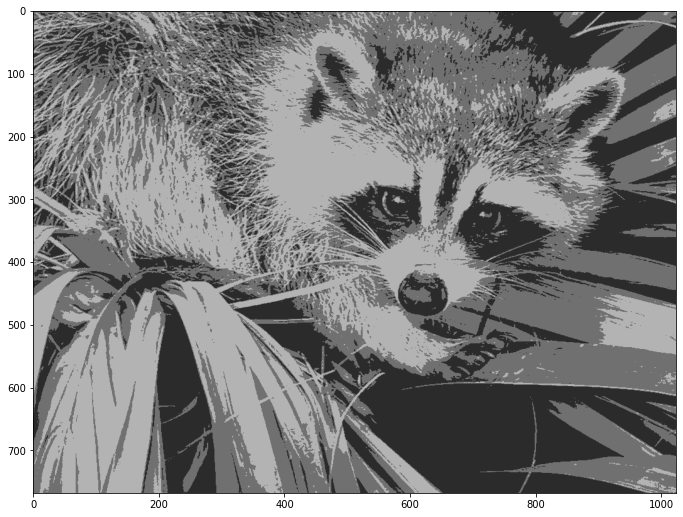

In [33]:
plt.figure(figsize=[1.5*7.68, 1.5*10.24])
plt.imshow(compressed_img, cmap='gray', vmin=gray_face.min(), vmax=gray_face.max())
plt.show()